Mount google drive into sample colab space

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


• DOMAIN: Entertainment

• CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene. The data labelling is already done. Since there higher time complexity is involved in the

• DATA DESCRIPTION: The dataset comprises of images and its mask for corresponding human face.

• PROJECT OBJECTIVE: To build a face detection system.

Steps and tasks: [ Total Score: 20 Marks]

In [3]:
# Import all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import tensorflow as tf 
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

1. Import and Understand the data [7 Marks]

A. Import and read ‘images.npy’. [1 Marks]

In [4]:
images_data = np.load('/content/drive/MyDrive/CV_Project_2/images.npy', allow_pickle=True)

In [5]:
images_data.shape

(409, 2)

B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]

Imp Note: Replace all the pixels within masked area with 1.
Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1].

In [6]:
features = images_data[:,0]
labels = images_data[:,1]

In [7]:
features.shape,labels.shape

((409,), (409,))

In [8]:
images_data[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [9]:
images_data[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [10]:
images_data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [11]:
# Unifying the image height and width to (@56,256)
img_ht = 256
img_wh = 256

In [12]:
# Store label and features after unifying the shape as an empty array.

label_fin = np.zeros((int(images_data.shape[0]), img_ht, img_wh))
img_fin = np.zeros((int(images_data.shape[0]), img_ht, img_wh, 3))
label_fin.shape, img_fin.shape

((409, 256, 256), (409, 256, 256, 3))

In [13]:
for ind in range(images_data.shape[0]):
    image = images_data[ind][0]
    image = cv2.resize(image, dsize=(img_ht, img_wh), interpolation=cv2.INTER_CUBIC)
    try:
      image = image[:, :, :3]
    except:
      continue
    img_fin[ind] = tensorflow.keras.applications.mobilenet_v2.preprocess_input(np.array(image, dtype=np.float32))
    for i in images_data[ind][1]:
        x1 = int(i["points"][0]['x'] * img_wh)
        x2 = int(i["points"][1]['x'] * img_wh)
        y1 = int(i["points"][0]['y'] * img_ht)
        y2 = int(i["points"][1]['y'] * img_ht)
        label_fin[ind][y1:y2, x1:x2] = 1

In [14]:
print("The unified shape of image features is :" , img_fin.shape)
print("The unified shape of labels mask is :", label_fin.shape)

The unified shape of image features is : (409, 256, 256, 3)
The unified shape of labels mask is : (409, 256, 256)


C. Split the data into train and test[400:9]. [1 Marks]

In [15]:
# Split train and test data in [400:9]
X_train, X_test, y_train, y_test = train_test_split(img_fin, label_fin, test_size=9, random_state=20)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 256, 256, 3), (9, 256, 256, 3), (400, 256, 256), (9, 256, 256))

D. Select random image from the train data and display original image and masked image. [2 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


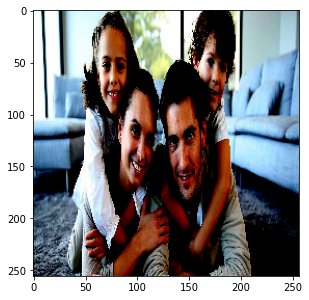

In [17]:
# Display original training image which is at index 2
fig = plt.figure(figsize=(20, 20))
plt.subplot(1,5,1)
plt.imshow(X_train[2])  
plt.tight_layout() 
plt.show()

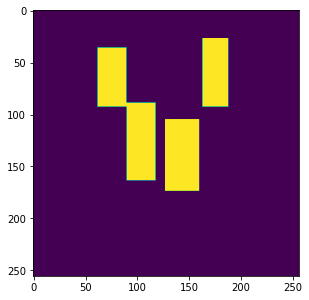

In [18]:
# Display corresponding Mask for training image which is at index 2
fig = plt.figure(figsize=(20, 20))
plt.subplot(1,5,1)
plt.imshow(y_train[2]) 
plt.tight_layout()
plt.show()

2. Model building [11 Marks]

In [19]:
from numpy.core.fromnumeric import shape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D,Activation, BatchNormalization,Concatenate, Input, Reshape, UpSampling2D
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.models import Model

  A. Design a face mask detection model. [4 Marks]

  Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.
  
  Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

In [20]:
# MobileNet Arcgitecture to train input layer using pre-trained imagenet weights

input =Input(shape= (img_ht, img_wh, 3),name= 'img_input')
encoder = MobileNetV2(input_tensor=input, include_top=False, alpha=0.35, weights="imagenet")
encoder.summary()

2031616/2019640 [==============================] - 0s 0us/step
Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 16  432         ['img_input[0][0]']              
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 16  64          ['Conv1[0][0]']                  
                

In [21]:
def create_model():

  input = Input(shape=(img_ht, img_wh, 3),name= "img_input")
  #Pre-trained Encoder
  encoder = MobileNetV2(input_tensor= input, include_top=False, alpha= 0.35, weights="imagenet")
  skip_connection_list = ["img_input", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
  enc_output =encoder.get_layer("block_13_expand_relu").output
 
  f = [16, 32, 48, 64]
  X = enc_output
  for i in range(1,len(skip_connection_list)+1,1):
    X_skip = encoder.get_layer(skip_connection_list[-i]).output
    print(X_skip)
    X = UpSampling2D([2,2])(X)
    X = Concatenate()([X, X_skip])

    X = Conv2D(f[-i], (3, 3), padding="same")(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)
        
    X = Conv2D(f[-i], (3, 3), padding="same")(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)
        
  X = Conv2D(1, (1, 1), padding="same")(X)
  X = Activation("sigmoid")(X)

  model = Model(input,X)
  return model

In [22]:
model = create_model()
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 96), dtype=tf.float32, name=None), name='block_6_expand_relu/Relu6:0', description="created by layer 'block_6_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 48), dtype=tf.float32, name=None), name='block_3_expand_relu/Relu6:0', description="created by layer 'block_3_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 48), dtype=tf.float32, name=None), name='block_1_expand_relu/Relu6:0', description="created by layer 'block_1_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='img_input'), name='img_input', description="created by layer 'img_input'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 256, 256, 3  0           []                      

B. Design your own Dice Coefficient and Loss function. [2 Marks]

In [23]:
def dice_coefficient(y_true, y_pred):
    num = 2 * tensorflow.reduce_sum(y_true * y_pred)
    den = tensorflow.reduce_sum(y_true + y_pred)

    return num/ (den + tensorflow.keras.backend.epsilon())

In [24]:
def dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

C. Train and tune the model as required. [3 Marks]

In [25]:
optimizer = tensorflow.keras.optimizers.Adam(1e-4)
metric = [dice_coefficient, Recall(), Precision()]
model.compile(loss = dice_loss, optimizer = optimizer, metrics = metric)

In [26]:
model.fit( X_train,y_train, epochs = 25, batch_size = 10, steps_per_epoch = 40) 

Epoch 1/25
40/40 [==============================] - 21s 109ms/step - loss: 1.7792 - dice_coefficient: 0.2753 - recall: 0.4383 - precision: 0.3403
Epoch 2/25
40/40 [==============================] - 4s 108ms/step - loss: 1.1728 - dice_coefficient: 0.4393 - recall: 0.7710 - precision: 0.5332
Epoch 3/25
40/40 [==============================] - 4s 109ms/step - loss: 1.0487 - dice_coefficient: 0.4881 - recall: 0.7921 - precision: 0.5786
Epoch 4/25
40/40 [==============================] - 4s 109ms/step - loss: 0.9296 - dice_coefficient: 0.5264 - recall: 0.8098 - precision: 0.6186
Epoch 5/25
40/40 [==============================] - 4s 109ms/step - loss: 0.8833 - dice_coefficient: 0.5416 - recall: 0.7988 - precision: 0.6413
Epoch 6/25
40/40 [==============================] - 4s 109ms/step - loss: 0.8207 - dice_coefficient: 0.5640 - recall: 0.8056 - precision: 0.6641
Epoch 7/25
40/40 [==============================] - 4s 111ms/step - loss: 0.8016 - dice_coefficient: 0.5717 - recall: 0.8014 - pr

In [27]:
test_steps = len(X_test)
model.evaluate(X_test, y_test, steps = test_steps)

9/9 [==============================] - 1s 9ms/step - loss: 0.8406 - dice_coefficient: 0.5983 - recall: 0.5559 - precision: 0.8690


[0.8406226634979248,
 0.5983132123947144,
 0.5559158325195312,
 0.8689827919006348]

3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image. [2 Marks]

In [28]:
X_test[3]

array([[[-0.90588236, -0.92156863, -0.93725491],
        [-0.92156863, -0.92941177, -0.94509804],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.78823531, -0.8509804 , -0.87450981],
        [-0.78039217, -0.84313726, -0.85882354],
        [-0.77254903, -0.82745099, -0.9137255 ]],

       [[-0.90588236, -0.92156863, -0.93725491],
        [-0.92156863, -0.92941177, -0.94509804],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.78039217, -0.83529413, -0.89019608],
        [-0.78039217, -0.83529413, -0.88235295],
        [-0.77254903, -0.82745099, -0.90588236]],

       [[-0.90588236, -0.92156863, -0.93725491],
        [-0.92156863, -0.92941177, -0.94509804],
        [-0.92156863, -0.92941177, -0.94509804],
        ...,
        [-0.78039217, -0.83529413, -0.88235295],
        [-0.78039217, -0.83529413, -0.88235295],
        [-0.77254903, -0.82745099, -0.90588236]],

       ...,

       [[ 1.        ,  1.        ,  1.        ],
        [ 1

In [29]:
test_img = X_test[3]

In [30]:
y_pred = model.predict(np.array([test_img]))
y_pred

array([[[[0.04240726],
         [0.05249866],
         [0.0394446 ],
         ...,
         [0.02358973],
         [0.02559317],
         [0.04891458]],

        [[0.03024505],
         [0.02653081],
         [0.02497599],
         ...,
         [0.02251671],
         [0.0217741 ],
         [0.02702815]],

        [[0.02971041],
         [0.02732098],
         [0.02348389],
         ...,
         [0.02367397],
         [0.02114467],
         [0.02709813]],

        ...,

        [[0.01780051],
         [0.02374513],
         [0.02711098],
         ...,
         [0.0458555 ],
         [0.06351787],
         [0.0750036 ]],

        [[0.02603227],
         [0.02420559],
         [0.02013427],
         ...,
         [0.04223954],
         [0.0700376 ],
         [0.05807651]],

        [[0.04341615],
         [0.02570804],
         [0.02585209],
         ...,
         [0.06206747],
         [0.04297697],
         [0.02414414]]]], dtype=float32)

In [31]:
pred_mask = cv2.resize((1.0*(y_pred[0] > 0.5)), (img_wh,img_ht))

**Viewing the predicted image and its face-detected output**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


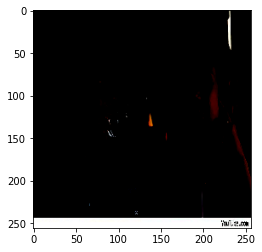

In [32]:
plt.imshow(test_img)

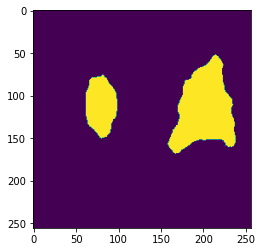

In [33]:
plt.imshow(pred_mask)

PART B - 10 Marks

• DOMAIN: Entertainment

• CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. The data labelling is already done. Since there higher time complexity is involved in the

• DATA DESCRIPTION: The dataset comprises of face images.

• PROJECT OBJECTIVE: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.


Steps and tasks: [ Total Score: 10 Marks]

1. Read/import images from folder ‘training_images’. [2 Marks]

In [34]:
from tqdm.notebook import trange, tqdm
from IPython.display import Image, display, clear_output, Markdown
import cv2
import glob
import os
import tensorflow as tf 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')

In [35]:
project_path = '/content/drive/MyDrive/CV_Project_2/'
image_file = 'training_images-20211126T092819Z-001.zip'

In [36]:
# Unzip the trainin_images zip file
img_zip_loc = os.path.join(project_path, image_file)

with ZipFile(img_zip_loc, 'r') as unzip:
  unzip.extractall()

In [37]:
## Extract unzipped Folder Location 

zip_dir_path = unzip.filelist[0].filename.split("/")[0] 
zip_dir_path

'training_images'

In [38]:
# Reading the file names
raw_img_filename = [os.path.join(zip_dir_path,i) for i in os.listdir(zip_dir_path)]
len(raw_img_filename)

1091

In [39]:
raw_img_filename[:]

['training_images/real_00188.jpg',
 'training_images/real_00950.jpg',
 'training_images/real_00572.jpg',
 'training_images/real_00035.jpg',
 'training_images/real_01054.jpg',
 'training_images/real_00095.jpg',
 'training_images/real_00248.jpg',
 'training_images/real_01024.jpg',
 'training_images/real_00230.jpg',
 'training_images/real_01015.jpg',
 'training_images/real_00755.jpg',
 'training_images/real_01012.jpg',
 'training_images/real_00677.jpg',
 'training_images/real_00287.jpg',
 'training_images/real_00992.jpg',
 'training_images/real_00818.jpg',
 'training_images/real_01035.jpg',
 'training_images/real_00936.jpg',
 'training_images/real_00974.jpg',
 'training_images/real_00090.jpg',
 'training_images/real_00367.jpg',
 'training_images/real_00866.jpg',
 'training_images/real_01067.jpg',
 'training_images/real_00923.jpg',
 'training_images/real_00434.jpg',
 'training_images/real_00016.jpg',
 'training_images/real_00877.jpg',
 'training_images/real_00162.jpg',
 'training_images/re

In [40]:
img_list = []
for images in tqdm(raw_img_filename):
  img_tst = cv2.imread(images)
  img_list.append(img_tst)
img_list = np.array(img_list)
img_list.shape

  0%|          | 0/1091 [00:00<?, ?it/s]

(1091, 600, 600, 3)

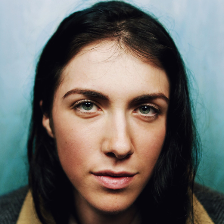

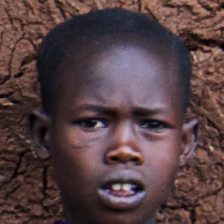

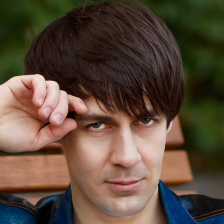

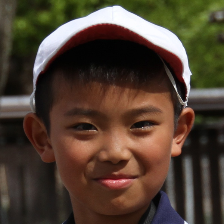

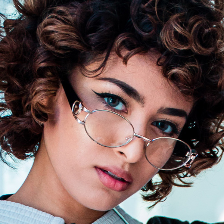

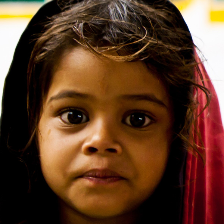

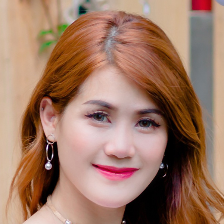

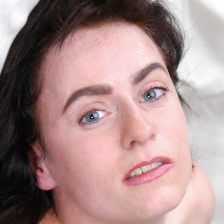

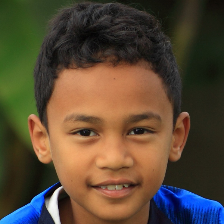

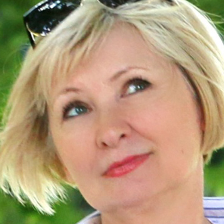

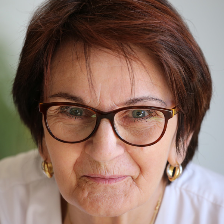

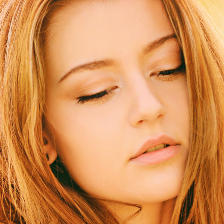

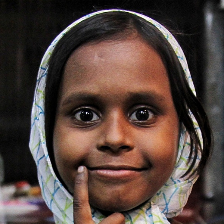

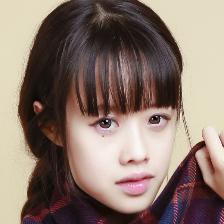

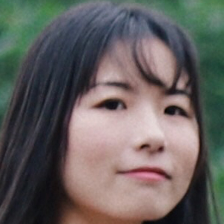

In [41]:
# Displaying the top 15 images after resizing the images to (224,224)
from google.colab.patches import cv2_imshow

for i in img_list[:15,]:
  cv2_imshow(cv2.resize(i,(224,224)))  

2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source.

In [42]:
# Downloading the HAAR CASCADE FRONTAL FACE. XML FILE
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-05-29 11:24:58--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2022-05-29 11:24:58 (51.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [43]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [44]:
undetected_imgs = []
detected_imgs = []

for imgs, fnames in tqdm(zip(img_list,raw_img_filename)):
  gray = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  if len(faces) == 0:
    undetected_imgs.append(fnames)
  else:
    detected_imgs.append(fnames)


0it [00:00, ?it/s]

In [45]:
len(detected_imgs), len(undetected_imgs)

(930, 161)

3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [46]:
output_img_df = pd.DataFrame(columns=['x','y','w','h','Total_Faces','Image_Name'])
output_img_df

,x,y,w,h,Total_Faces,Image_Name


In [47]:
def test_bb (df,fname,title=""):

  img_tst = cv2.imread(fname)
  temp_df = df[df['Image_Name'] == fname]
  rect_img = []
  for rows in temp_df.index:
    X = df['x'][rows]
    Y = df['y'][rows]
    W = df['w'][rows]
    H = df['h'][rows]
    cv2.rectangle(img_tst, (X, Y), ( X+W, Y+H) ,(255,0,0),2)
    cv2.putText(img_tst, title, (int((X+W)*0.75), Y-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255))
  cv2_imshow(img_tst)
  
  return

In [48]:
def show_face(img_list,scale=1.0):

  for images in img_list:
    image = cv2.imread(images)
    image_w  = int(image.shape[1]*scale)
    image_h = int(image.shape[0]*scale)
    image = cv2.resize(image,(image_w,image_h))
    display(Markdown(f"#### {images}"))
    cv2_imshow(image)

  return

In [49]:
undetected_imgs = []
detected_imgs = []

for imgs, fnames in tqdm(zip(img_list,raw_img_filename)):
  gray = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  if len(faces) == 0:
    undetected_imgs.append(fnames)
    temp_dict = {'x':0, 'y':0, 'w':-1, 'h':-1, 'Total_Faces':0, 'Image_Name':fnames} 

  else:
    detected_imgs.append(fnames)
    for (X,Y,W,H) in faces:
      temp_dict = {'x':X,'y':Y,'w': W,'h':H, 'Total_Faces':len(faces), 'Image_Name':fnames} 
      
      output_img_df = output_img_df.append(temp_dict,ignore_index=True)

0it [00:00, ?it/s]

In [50]:
output_img_df

,x,y,w,h,Total_Faces,Image_Name
0,106,125,410,410,1,training_images/real_00188.jpg
1,140,172,382,382,1,training_images/real_00950.jpg
2,162,226,347,347,1,training_images/real_00572.jpg
3,112,175,392,392,1,training_images/real_00035.jpg
4,62,142,418,418,1,training_images/real_00095.jpg
...,...,...,...,...,...,...
1006,114,0,462,462,1,training_images/real_00486.jpg
1007,99,159,379,379,1,training_images/real_00242.jpg
1008,12,65,465,465,1,training_images/real_00063.jpg
1009,74,148,377,377,1,training_images/real_00726.jpg


4. Save the output Dataframe in .csv format. [2 Marks]

In [51]:
output_img_df.to_csv(r'/content/drive/MyDrive/CV_Project_2/output.csv', index=False)

Part C - 30 Marks

• DOMAIN: Face Recognition

• CONTEXT: Company X intends to build a face identification model to recognise human faces.

• DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.

• PROJECT OBJECTIVE: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. Some data samples:

Steps and tasks: [ Total Score: 30 Marks]

In [52]:
import numpy as np
import os
import cv2
import glob
import tensorflow as tf 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications import MobileNetV2

1. Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

In [53]:
path = '/content/drive/MyDrive/CV_Project_2/PINS.zip'

In [54]:
from zipfile import ZipFile
with ZipFile (path,'r') as pins:
  pins.extractall() 

2. Write function to create metadata of the image. [4 Marks]

Hint: Metadata means derived information from the available data which can be useful for particular problem statement.

In [55]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 


3. Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]

In [56]:
# Function to load data
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [57]:
# Call load_metadata to read the images and assign metadata to a variable
metadata = load_metadata('PINS')

In [58]:
# Function to read image using opencv and convert it from BGR to RGB

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    
    return img[...,::-1]

In [59]:
load_image(metadata[0].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]

Hint: Use ‘vgg_face_weights.h5’

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [61]:
# Load the VGGFace Model
model = vgg_face()
pre_train_weights = '/content/drive/MyDrive/CV_Project_2/vgg_face_weights.h5'

In [62]:
# VGG Face Descriptor
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [63]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [64]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [65]:
total_images = len(metadata)
print(total_images)

10770


In [66]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [67]:
embeddings.shape

(10770, 2622)

5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [68]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

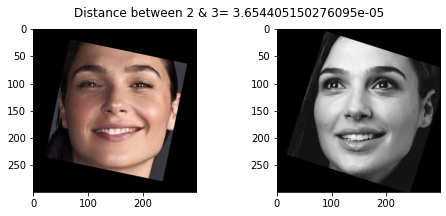

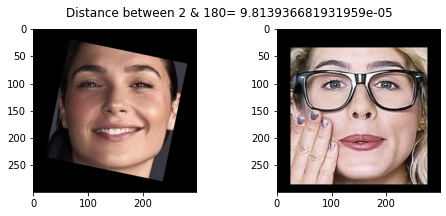

In [69]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

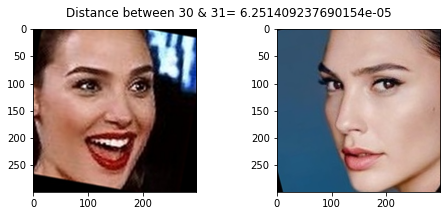

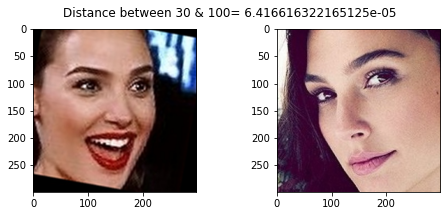

In [70]:
show_pair(30, 31)
show_pair(30, 100)

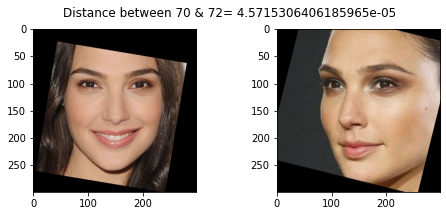

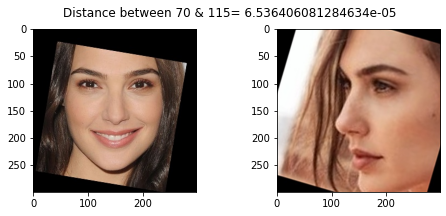

In [71]:
show_pair(70, 72)
show_pair(70, 115)

6. Use PCA for dimensionality reduction. [2 Marks]

- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [72]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx] #train labels
y_test = targets[test_idx]  #test labels

In [73]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

- Encode the targets
- Use LabelEncoder

In [74]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train_en = LE.fit_transform(y_train)
y_test_en = LE.transform(y_test)


- Scale the features using StandardScaler

In [75]:
# Standarize features
from sklearn.preprocessing import StandardScaler
# Standarize features
SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.transform(X_test)

- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
#### Add your code here ####

7. Build an SVM classifier in order to map each image to its right person. [4 Marks]

In [77]:
from sklearn.svm import SVC

clf = SVC(C= 10, gamma=0.01)
clf.fit(X_train_pca, y_train_en)

SVC(C=10, gamma=0.01)

In [78]:
y_predict = clf.predict(X_test_pca)

In [79]:
y_predict_en = LE.inverse_transform(y_predict)

In [80]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_en)

y_predict :  [76 76 76 ... 76 76 76]
y_test_encoded :  [79 79 79 ... 37 37 37]


8. Import and display the the test images. [2 Marks]



In [81]:
Test_image_1=load_image('/content/drive/MyDrive/CV_Project_2/Benedict Cumberbatch9.jpg')
Test_image_2=load_image('/content/drive/MyDrive/CV_Project_2/Dwayne Johnson4.jpg')

In [82]:
Test_image_1 = (Test_image_1 / 255.).astype(np.float32)
Test_image_1 = cv2.resize(Test_image_1, dsize = (224,224))
Test_image_2 = (Test_image_2 / 255.).astype(np.float32)
Test_image_2 = cv2.resize(Test_image_2, dsize = (224,224))
Test_image_1.shape, Test_image_2.shape

((224, 224, 3), (224, 224, 3))

9. Use the trained SVM model to predict the face on both test images. [4 Marks]

In [83]:
embedding_1 = np.zeros((1, 2622))
embedding_2 = np.zeros((1, 2622))

In [84]:
embedding_vector_1 = vgg_face_descriptor.predict(np.expand_dims(Test_image_1, axis=0))[0]
embedding_1[0]= embedding_vector_1
embedding_vector_2 = vgg_face_descriptor.predict(np.expand_dims(Test_image_2, axis=0))[0]
embedding_2[0]= embedding_vector_2
print(embedding_vector_1.shape)
print(embedding_vector_2.shape)

(2622,)
(2622,)


In [85]:
first_image = embedding_1
second_image = embedding_2

In [86]:
X_test_1 = SC.transform(first_image)
X_test_2 = SC.transform(second_image)

In [87]:
X_test_pca_1 = pca.transform(X_test_1)
X_test_pca_2 = pca.transform(X_test_2)

In [88]:
X_test_pca_1.shape
X_test_pca_2.shape

(1, 128)

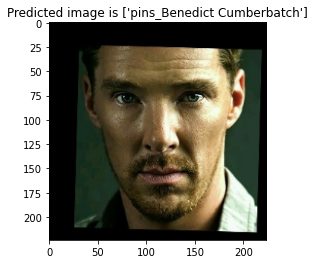

In [89]:
y_predict_1 = clf.predict(X_test_pca_1)
y_predict_enc_1 = LE.inverse_transform(y_predict_1)
plt.imshow(Test_image_1)
plt.title(f'Predicted image is {y_predict_enc_1}');

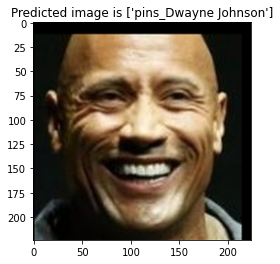

In [90]:
y_predict_2 = clf.predict(X_test_pca_2)
y_predict_enc_2 = LE.inverse_transform(y_predict_2)

plt.imshow(Test_image_2)
plt.title(f'Predicted image is {y_predict_enc_2}');